## **Data Mining with Python**
### **Semana 12: Ensamblados**
**Andrés C. Medina Sanhueza**

PhD(c) Engineering Systems

Lead Advanced Analytics Financial Retail Cencosud-Scotiabank

anmedinas@gmail.com

<img src="https://files.realpython.com/media/How-to-Do-a-Binary-Search-in-Python_Watermarked.e06f21f5a58b.jpg" width=700 height=400/>

In [1]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
from plotnine import *
import numpy as np
import pandas as pd

In [2]:
# Cargando el dataset de la flor de iris
iris   = datasets.load_iris()
tempDF = pd.DataFrame(iris.data,columns=iris.feature_names)
tempDF['clase']=iris.target_names[iris.target]

X_train, X_test, y_train, y_test = train_test_split(iris.data,iris.target, test_size=0.33, random_state=42)

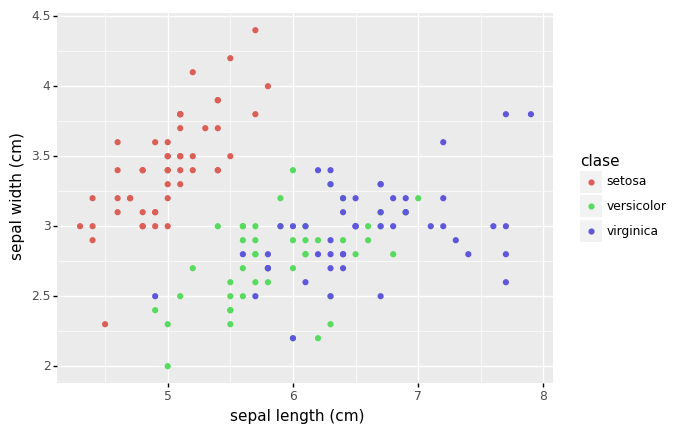

<ggplot: (8741913366851)>

In [4]:
(
    ggplot(tempDF) + aes(x="sepal length (cm)", y="sepal width (cm)",color="clase") + 
    geom_point()
)

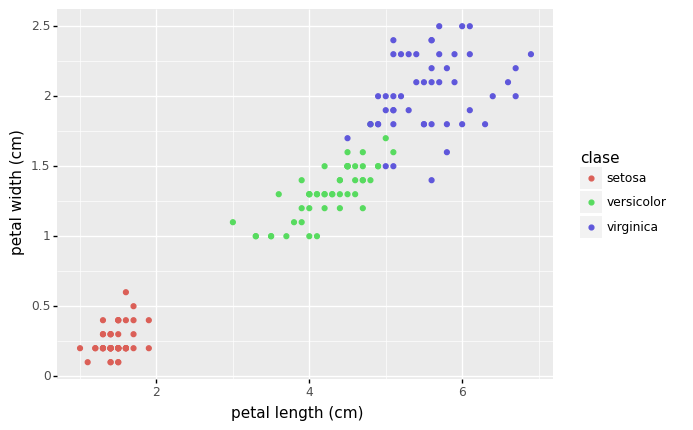

<ggplot: (8741913271715)>

In [5]:
(
    ggplot(tempDF) + 
    aes(x="petal length (cm)", y="petal width (cm)",color="clase") + 
    geom_point()
)

---

### **Modulo Ensemble**

La clase `RandomForestClassifier` del módulo `sklearn.ensemble` nos permite implementar un ensemble con árboles de decisión. Como es de esperar, la mayoría de los parámetros son los mismos que en un árbol de decisión.

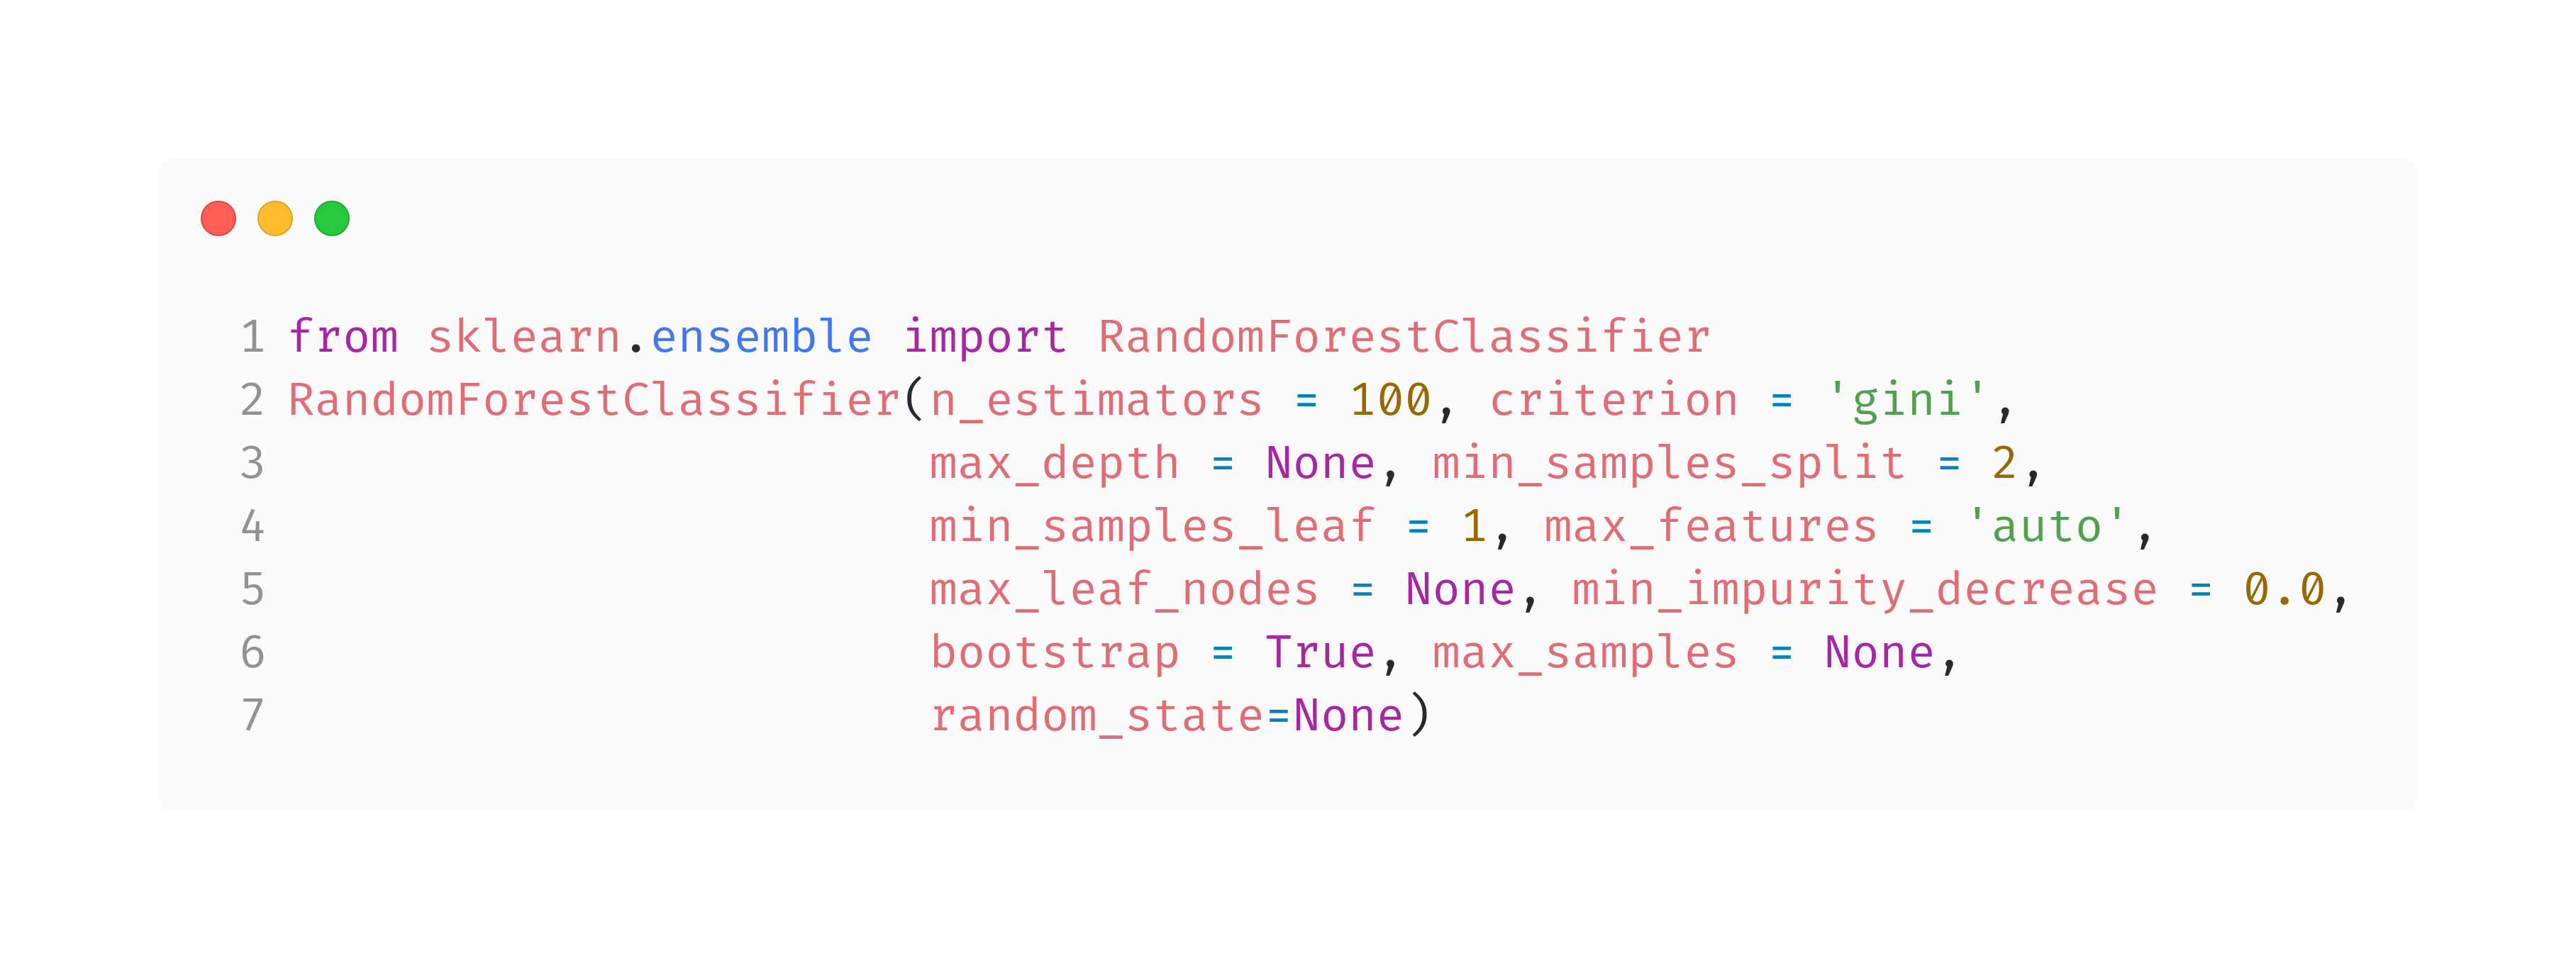

In [6]:
from IPython.display import Image
Image("figs/randomforest.png")

Los parámetros de la clase, son las siguientes:

* `n_estimators:` Número de árboles en el forest.
* `criterion:` función de score para la generación del árbol, puede ser "gini" o "entropy".
* `max_depth:` valor entero, indicando la máxima profundidad del árbol.
* `min_samples_split:` valor entero, número mínimo de puntos para separar un nodo. En caso de un valor float se considera como la proporción de los datos.
* `min_samples_leaf:` valor entero, número mínimo de puntos que tiene que tener una hoja. En caso de un valor float se considera como la proporción de los datos.
* `max_features:` máxima cantidad de variables a considerar cuando se evalua la separación de un nodo.
    * int => número máximo de variables a considerar.<br>
    * float => número entre 0 y 1 correspondiente a la proporción del número de variables.<br>
    * “auto” => max_features=sqrt(n_features), la raíz cuadrada del número de variables.<br>
    * “sqrt” => max_features=sqrt(n_features), lo mismo que auto.<br>
    * “log2” => max_features=log2(n_features).<br>
    * None => max_features=n_features.
* `max_leaf_nodes:` valor entero indicando el número máximo de nodos hojas.
* `min_impurity_decrease:` valor float. Un nodo se separará si solo si el grado de impureza disminuye más que el valor definido. El grado de impureza se define como: N_t / N * (impurity - N_t_R / N_t * right_impurity- N_t_L / N_t * left_impurity). donde N, N_t, N_t_l, y N_t_r son el número de muestras totales, del nodo, del hijo izquierdo, y del hijo derecho, respectivamente.
* `bootstrap:` valor booleano, define si una muestra boostrap se utiliza en el proceso. Caso contrario se usan todos los datos.
* `max_samples:` Número de puntos a samplear para las muestras bootstrap. Puede ser un valor entero o un valor enter 0 y 1 correspondiente al porcentaje de la muestra.
* `random_state:` para replicar un experimento.

Los atributos de la clase, son los siguientes:

* `classes_:` las etiquetas de las clases.
* `feature_importances_:`importancia de las variables.

Los métodos o funciones de la clase, son las siguientes:

* `fit(X, y):` "Entrenamiento" del modelo, se tiene que dar los datos y la clase Y
* `predict(X):` predice las etiquetas para los puntos dados
* `predict_proba(X):` predice las probabilidades de las clases para los puntos dados
* `predict_log_proba(X):` predice el logaritmo de las probabilidades de las clases para los puntos dados (mayor estabilidad)

In [7]:
# Creando un árbol de decisión con las condiciones iniciales
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=100)
RF = RF.fit(X_train,y_train)

# Aplicando el modelo a otros datos
resultado=RF.predict(X_test)
print("Resultado de la predicción:\n",resultado)
print("Resultado original:\n",y_test)

# Aplicando el modelo a otros datos
resultado=RF.predict_proba(X_test)
print("Resultado de la predicción:\n",resultado)

Resultado de la predicción:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 1 2 1 2]
Resultado original:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 2 2 1 2]
Resultado de la predicción:
 [[0.   1.   0.  ]
 [0.98 0.02 0.  ]
 [0.   0.   1.  ]
 [0.   0.96 0.04]
 [0.   0.92 0.08]
 [0.98 0.02 0.  ]
 [0.   1.   0.  ]
 [0.   0.15 0.85]
 [0.   0.78 0.22]
 [0.   1.   0.  ]
 [0.   0.15 0.85]
 [1.   0.   0.  ]
 [0.97 0.03 0.  ]
 [1.   0.   0.  ]
 [1.   0.   0.  ]
 [0.03 0.87 0.1 ]
 [0.   0.   1.  ]
 [0.   0.99 0.01]
 [0.   1.   0.  ]
 [0.   0.   1.  ]
 [1.   0.   0.  ]
 [0.   0.14 0.86]
 [1.   0.   0.  ]
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 [0.   0.05 0.95]
 [0.   0.02 0.98]
 [0.   0.   1.  ]
 [1.   0.   0.  ]
 [1.   0.   0.  ]
 [1.   0.   0.  ]
 [0.98 0.02 0.  ]
 [0.01 0.99 0.  ]
 [1.   0.   0.  ]
 [1.   0.   0.  ]
 [0.   0.09 0.91]
 [0.03 0.96 0.01]
 [1.   0.   0.  ]
 [1.   0.   0.  ]
 [1.   0.   0

---

### **Interpretando el árbol**

El árbol de decisión es sumamente sencillo de interpretar, basta con observar el árbol y la variable `feature_importances_`. `feature_importances_` se calcula como la reducción (normalizada, para que la suma sea 1.0) de la reducción de la función de score para esa variable.

In [8]:
print(iris.feature_names)
print("importancia de las variables:\n",RF.feature_importances_)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
importancia de las variables:
 [0.08421995 0.03749267 0.42563845 0.45264893]


---

### **Visualización basado en la probabilidad**

In [9]:
# Generando dos lunas
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
tempData=make_moons(n_samples=1000,shuffle=True, noise=0.3, random_state=None)
tempData[1]
tempData[0][:,0]=tempData[0][:,0]
tempData[0][:,1]=tempData[0][:,1]

# Entrenando el modelo y aplicando a una grilla de puntos para su visualización
RF = RandomForestClassifier(n_estimators=10,max_depth=2)
RF = RF.fit(tempData[0],tempData[1])

# Creando una grilla de evaluación
x = np.arange(-2.0, 3.5, 0.05)
y = np.arange(-1.5, 2.5, 0.05)
temp = np.meshgrid(x, y)
dataTest=pd.DataFrame(temp[0].flatten(),columns=["xx"])
dataTest.insert(1,"yy",temp[1].flatten())

# Prediciendo y graficando el output
estimatedProbs=RF.predict_proba(dataTest.iloc[:,0:2])

# Creando el dataframe a graficar
output=(((1-estimatedProbs[:,0])*255).astype("int"))
dataTest.insert(2, "ClassOutput", "0")
for i in range(dataTest.shape[0]):
    dataTest.ClassOutput[i]='#%02x%02x%02x' % (255-output[i],0,output[i])

# Colores para los puntos originales
colorData=pd.DataFrame(list(map(str,tempData[1])),columns=["colorClass"])
colorData.colorClass[colorData.colorClass=="0"]="Red"
colorData.colorClass[colorData.colorClass=="1"]="Blue"

/tmp/ipykernel_323140/1540393949.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


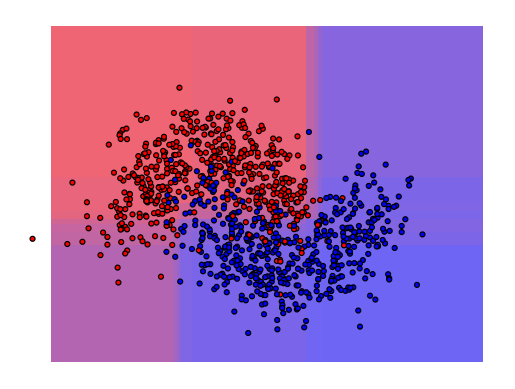

<ggplot: (8741911014367)>

In [10]:
(
    ggplot() + 
    theme_void() + 
    geom_tile(aes(x=dataTest.xx,y=dataTest.yy),alpha=0.6,show_legend=False,fill=dataTest.ClassOutput) + 
    geom_point(aes(x=tempData[0][:,0],y=tempData[0][:,1]),show_legend=False,color="black",fill=colorData)
)

---

### **Clase `BaggingClassifier()`**

La clase `BaggingClassifier` del módulo `sklearn.ensemble` implementa cualquier tipo de ensemble basado en un muestreo tipo boostrap. La predicción final es realizada con el promedio o la mayoría de los votos.

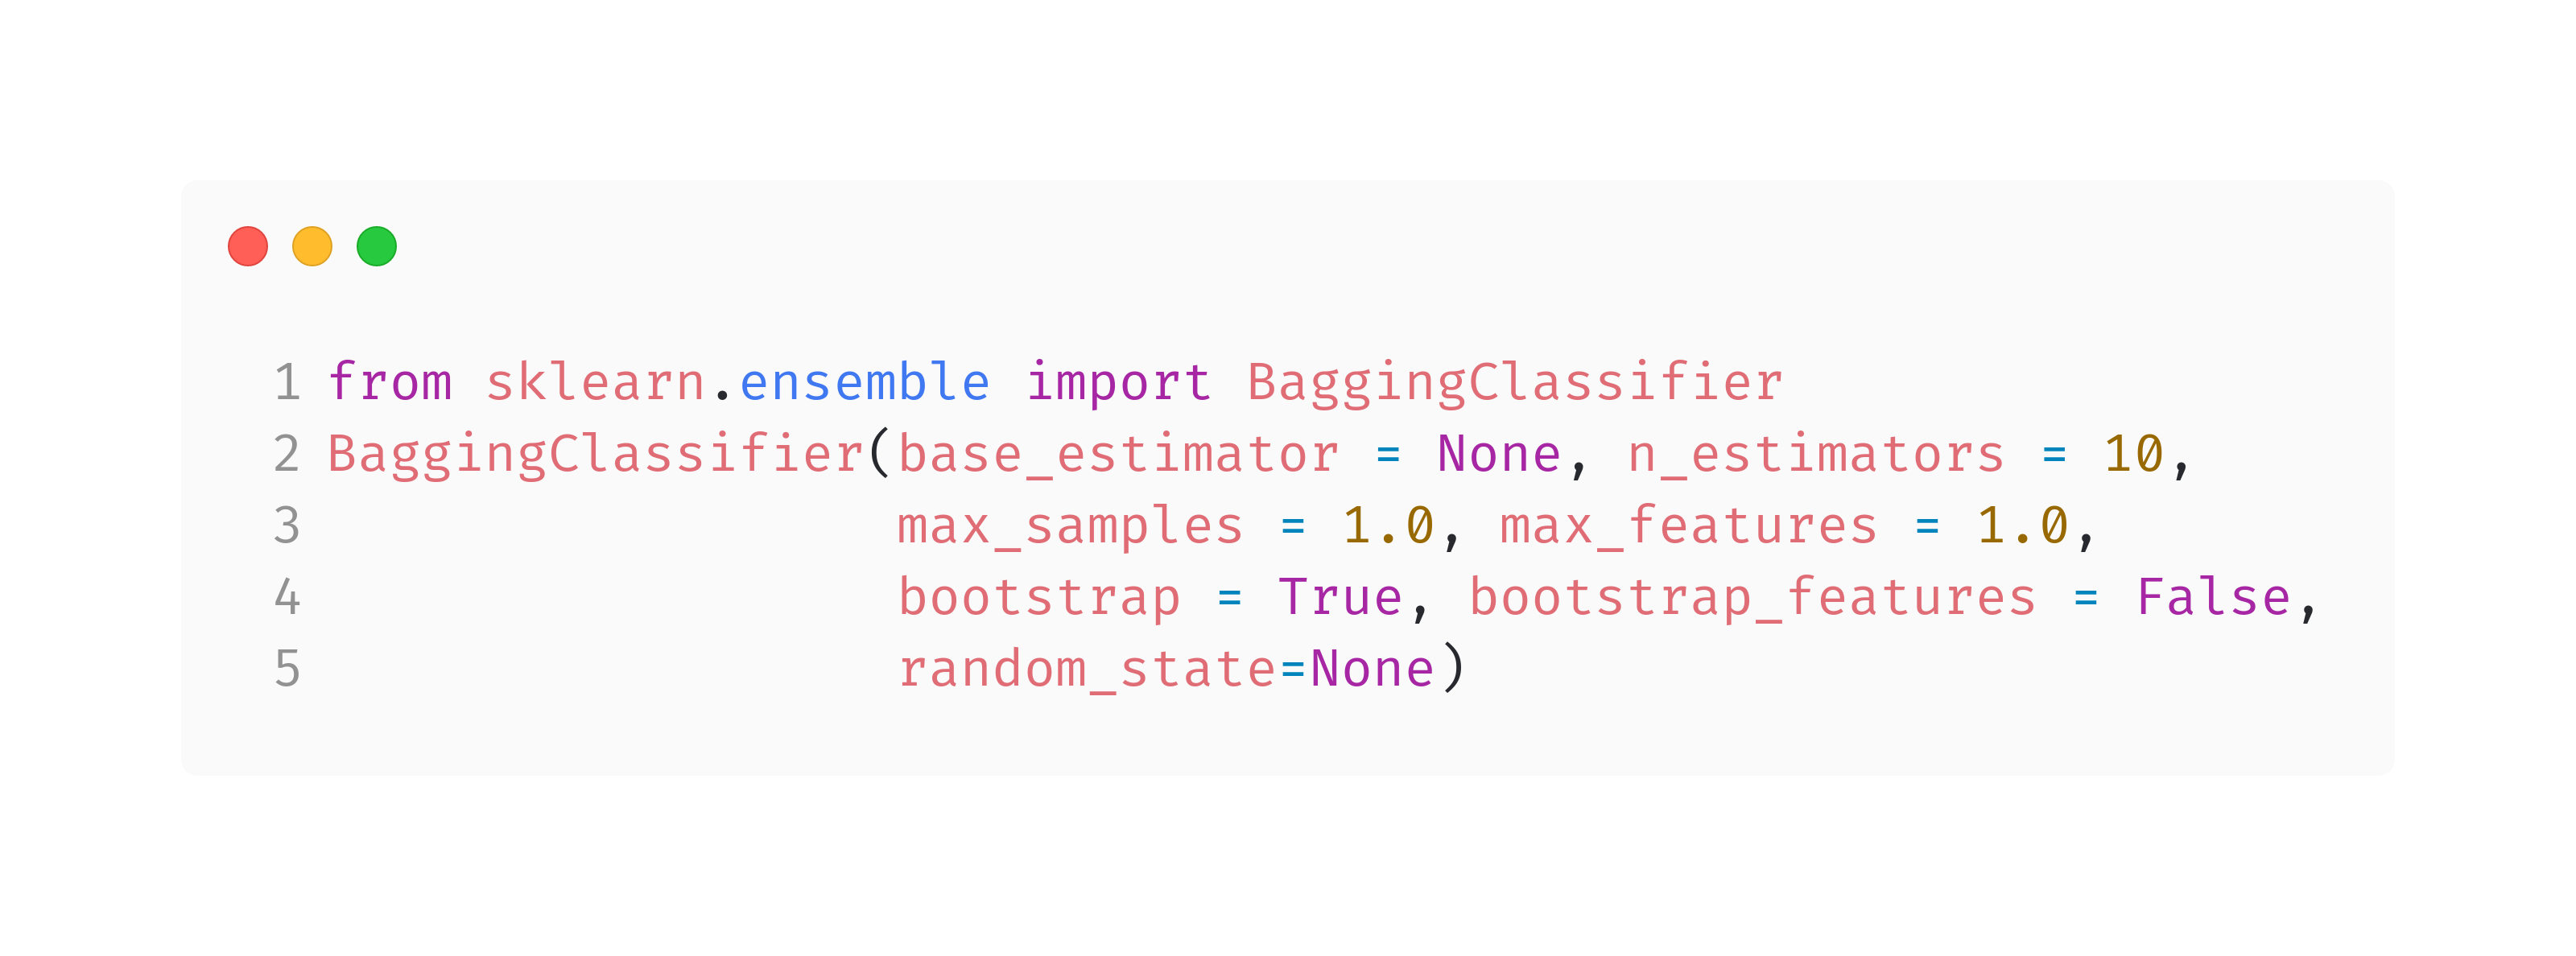

In [11]:
from IPython.display import Image
Image("figs/bagging.png")

Los parámetros de la clase, son las siguientes:

* `base_estimator:` nombre de la clase y sus respectivos parámetros del modelo a utilizar.
* `n_estimators:` Número de modelos a utilizar en el ensamblado.
* `max_samples:` Número de puntos a samplear con reemplazo para las muestras bootstrap. Puede ser un valor entero o un valor entre 0 y 1 correspondiente al porcentaje de la muestra
* `max_features:` Número de muestras a samplear sin reemplazo para las muestras bootstrap. Puede ser un valor entero o un valor entre 0 y 1 correspondiente al porcentaje de la muestra.
* `bootstrap:` valor booleano, define si las muestras de los datos se hacen con reemplazo.
* `bootstrap_features:` valor booleano, define si las muestras de las variables se hacen con reemplazo.
* `random_state:` para replicar un experimento.

Los atributos de la clase, son los siguientes:

* `base_estimator_:` estimador base utilizado
* `classes_:` las etiquetas de las clases.
* `estimators_samples_:` Las muestras utilizadas como entrenamiento para cada modelo.

Los métodos o funciones de la clase, son las siguientes:

* `decision_function(X):` Promedio de la decisión de los clasificadores bases. Siempre y cuando el modelo base pueda aplicar esta función.
* `fit(X, y):` "Entrenamiento" del modelo, se tiene que dar los datos y la clase Y
* `predict(X):` predice las etiquetas para los puntos dados. Se utiliza el mayor promedio de las probabilidades. Si un modelo no puede calcular las probabilidades, entonces se utiliza la mayor cantidad de votos.
* `predict_proba(X):` predice las probabilidades de las clases para los puntos dados
* `predict_log_proba(X):` predice el logaritmo de las probabilidades de las clases para los puntos dados (mayor estabilidad)

In [12]:
# Creando un árbol de decisión con las condiciones iniciales
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
EB = BaggingClassifier(base_estimator=SVC(C=4),n_estimators=15)
EB = EB.fit(X_train,y_train)

# Aplicando el modelo a otros datos
resultado=EB.predict(X_test)
print("Resultado de la predicción:\n",resultado)
print("Resultado original:\n",y_test)

resultado=EB.predict_proba(X_test)
print("Resultado de la predicción:\n",resultado[:10])

# Solo para los modelos con esta característica
resultado=EB.decision_function(X_test)
print("Resultado de la predicción:\n",resultado[:10])

Resultado de la predicción:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 1 2 1 2]
Resultado original:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 2 2 1 2]
Resultado de la predicción:
 [[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]]
Resultado de la predicción:
 [[-0.23679346  2.23952494  0.97070159]
 [ 2.22631548  1.22278639 -0.26855408]
 [-0.21032905  0.78361435  2.26064213]
 [-0.23602834  2.23678595  0.99035958]
 [-0.23504638  2.2320363   1.02564718]
 [ 2.22928516  1.21045259 -0.2657706 ]
 [-0.19925923  2.25611694  0.78490661]
 [-0.23632274  1.12242119  2.21490068]
 [-0.24138215  2.23042949  1.08378036]
 [-0.21788554  2.25621478  0.80410876]]


In [13]:
print("Muestras utilizadas: ",EB.estimators_samples_)

Muestras utilizadas:  [array([46, 47, 57, 41, 22,  0, 60, 42, 57, 55, 49, 90, 45, 14, 20, 11, 25,
       37, 68, 37, 12, 66, 66, 11, 93, 83, 81, 38, 12, 62, 66,  3, 36, 89,
       80, 23, 28, 83, 21, 44, 51, 98, 35, 25, 91,  5, 50, 81, 47, 12, 64,
       28, 21, 57, 42, 21, 63, 32, 92, 47, 26, 38, 63, 91, 53, 12, 75, 63,
       54, 97, 27, 25, 95, 22, 39, 57, 11,  5, 97, 18, 49, 91, 12, 47, 20,
       81, 42, 20, 67, 61, 27, 38, 49, 24, 85, 70, 22, 47, 28, 68]), array([58, 13, 74, 48, 53, 59, 64, 97, 20, 98, 39, 49,  0, 95, 77,  2, 16,
        2, 64, 86, 92, 21, 11, 82, 80, 55, 39, 99, 92, 52, 12, 54, 11, 52,
       41, 80, 37, 55,  8, 49,  9, 48, 62, 32, 95, 94, 58,  0, 73, 91, 94,
       58, 16, 50, 80, 14, 43, 91, 40, 74, 50, 10,  9, 82, 26, 70, 90,  9,
       18, 85, 35, 24, 71, 33, 20, 65, 66, 10, 14, 41, 14, 76, 80, 59,  6,
       25, 15, 54, 47, 76, 60, 71, 71, 96, 21, 93, 86, 96, 36, 88]), array([84, 89, 37, 40, 93, 31, 54, 21, 58, 40, 55, 75, 89, 92, 69, 40, 29,
       33, 38,

---

### **Clase `AdaBoostClassifier()`**

La clase `AdaBoostClassifier` del módulo `sklearn.ensemble` implementa cualquier tipo de ensemble basado en un muestreo tipo `adaboost`. La predicción final es realizada como un promedio ponderado de los errores de cada modelo.

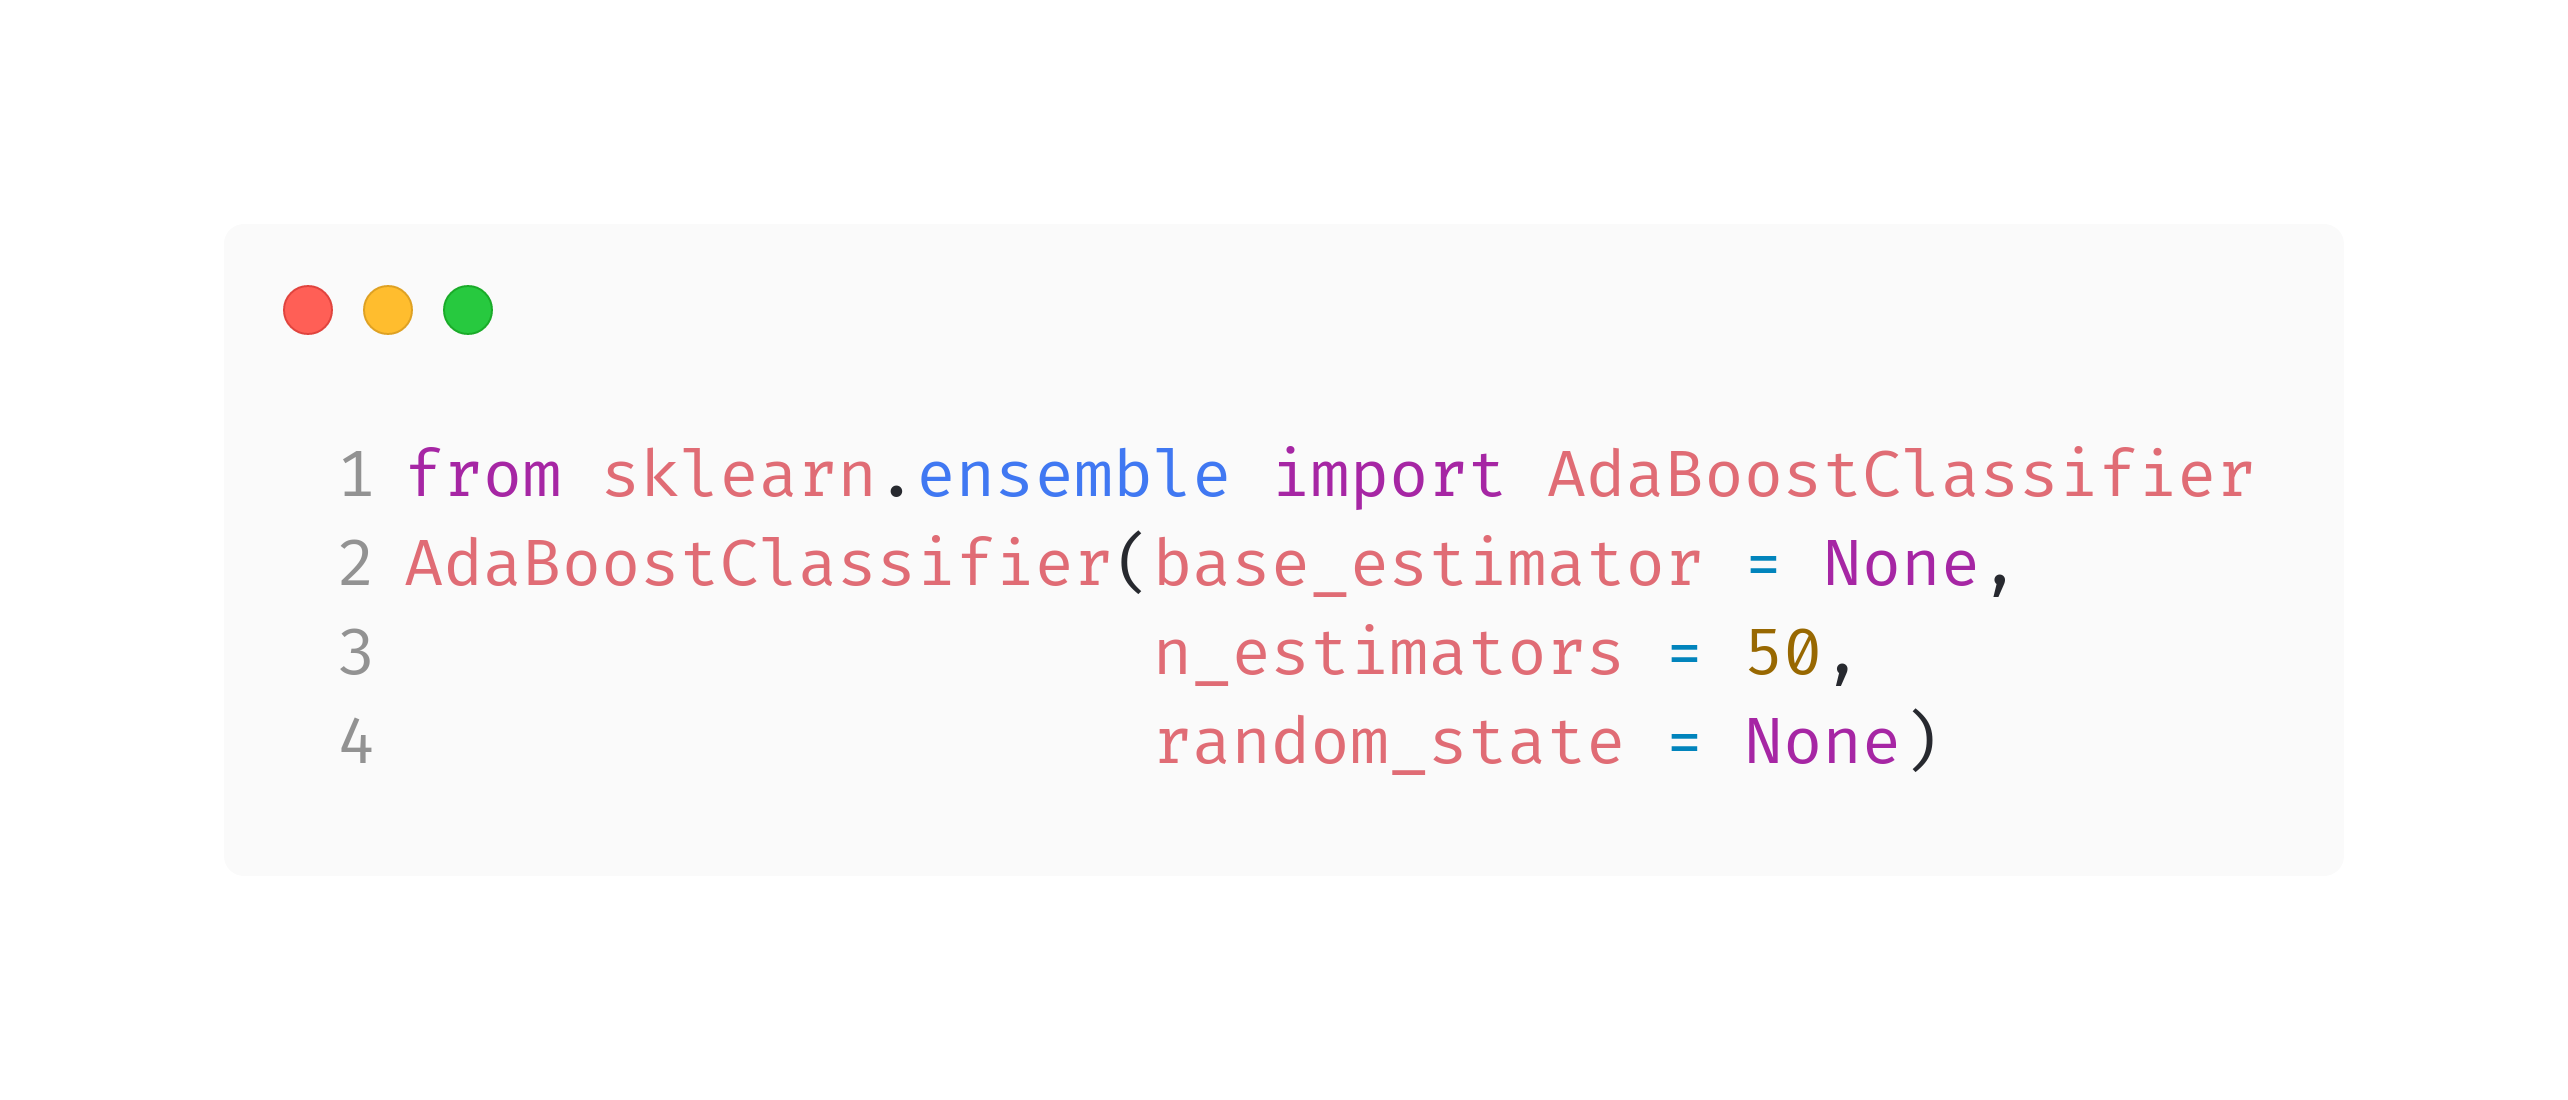

In [14]:
from IPython.display import Image
Image("figs/adaboost.png")

Los parámetros de la clase, son las siguientes:

* `base_estimator:` nombre de la clase y sus respectivos parámetros del modelo a utilizar.
* `n_estimators:` Número de modelos a utilizar en el ensamblado.
* `random_state:` para replicar un experimento.

Los atributos de la clase, son los siguientes:

* `base_estimator_:` estimador base utilizado.
* `classes_:` las etiquetas de las clases.
* `estimator_weights_:` pesos en cada iteración.
* `estimator_errors_:` Error de clasificación para cada modelo.

Los métodos o funciones de la clase, son las siguientes:

* `decision_function(X):` Promedio de la decisión de los clasificadores bases. Siempre y cuando el modelo base pueda aplicar esta función.
* `fit(X, y):` "Entrenamiento" del modelo, se tiene que dar los datos y la clase Y
* `predict(X):` predice las etiquetas para los puntos dados. Se utiliza el mayor promedio de las probabildiaes. Si un modelo no puede calcular las probabilidades, entonces se utiliza la mayor cantidad de votos.
* `predict_proba(X):` predice las probabilidades de las clases para los puntos dados
* `predict_log_proba(X):` predice el logaritmo de las probabilidades de las clases para los puntos dados (mayor estabilidad)

In [15]:
# Creando un adaboost con árbol de decisión de decisión con las condiciones iniciales
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

AB = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(),n_estimators=15)
AB = AB.fit(X_train,y_train)

# Aplicando el modelo a otros datos
resultado=AB.predict(X_test)
print("Resultado de la predicción:\n",resultado)
print("Resultado original:\n",y_test)

resultado=AB.predict_proba(X_test)
print("Resultado de la predicción:\n",resultado[:10])

Resultado de la predicción:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 1 2 1 2]
Resultado original:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 2 2 1 2]
Resultado de la predicción:
 [[2.22044605e-16 1.00000000e+00 2.22044605e-16]
 [1.00000000e+00 2.22044605e-16 2.22044605e-16]
 [2.22044605e-16 2.22044605e-16 1.00000000e+00]
 [2.22044605e-16 1.00000000e+00 2.22044605e-16]
 [2.22044605e-16 1.00000000e+00 2.22044605e-16]
 [1.00000000e+00 2.22044605e-16 2.22044605e-16]
 [2.22044605e-16 1.00000000e+00 2.22044605e-16]
 [2.22044605e-16 2.22044605e-16 1.00000000e+00]
 [2.22044605e-16 1.00000000e+00 2.22044605e-16]
 [2.22044605e-16 1.00000000e+00 2.22044605e-16]]


---

### **Clase `GradientBoostingClassifier()`**

La clase `GradientBoostingClassifier` del módulo `sklearn.ensemble` implementa un emsemble de gradient boosting basado en árbol de decisión. La predicción final es realizada como la suma de predicciones de cada modelo.

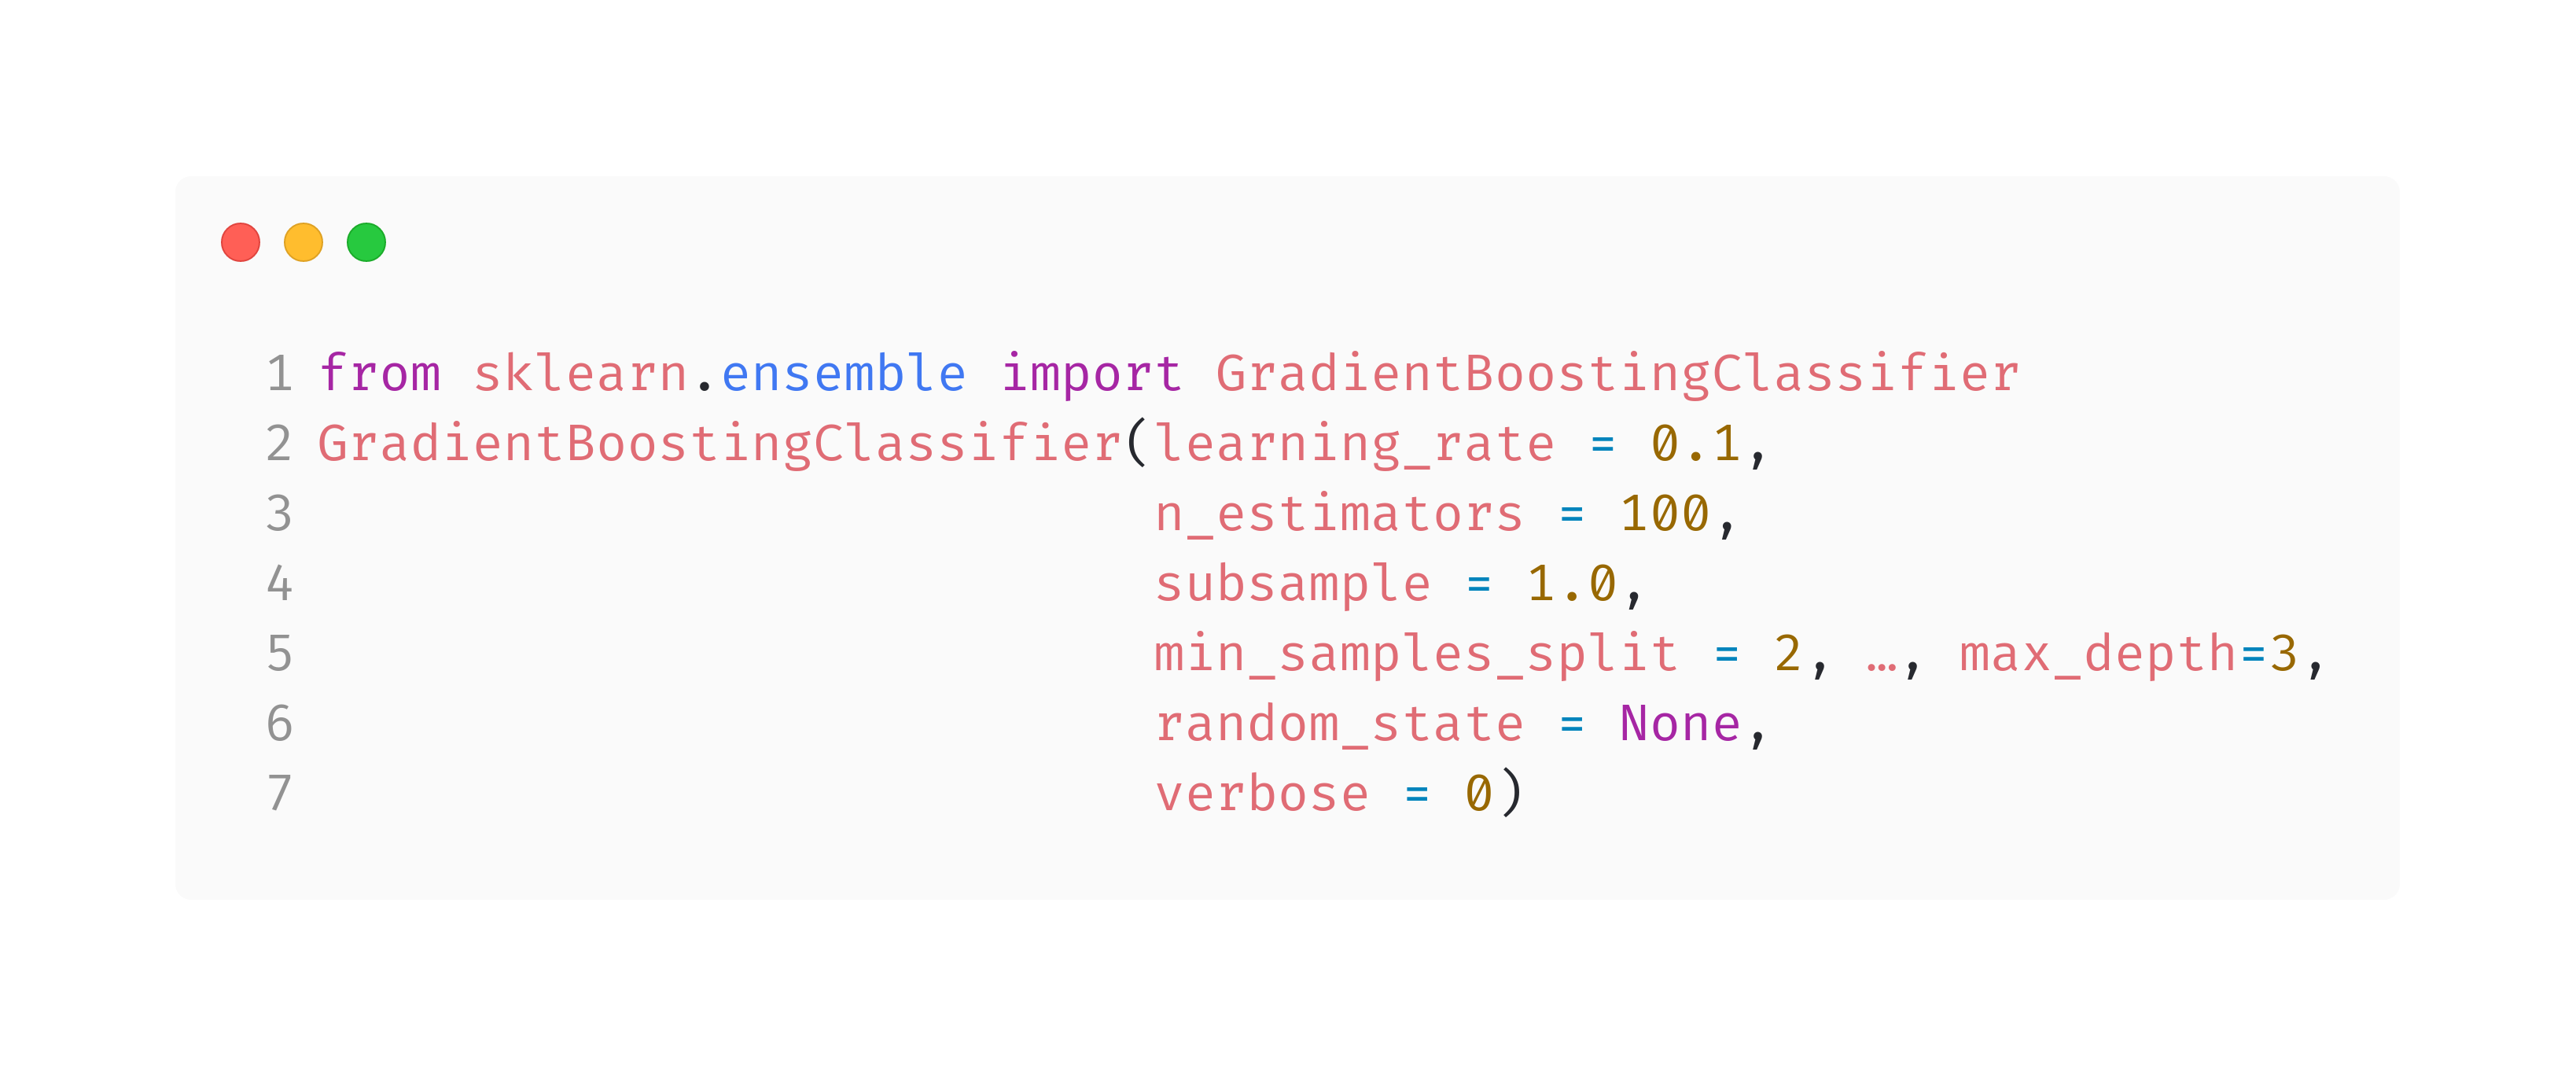

In [16]:
from IPython.display import Image
Image("figs/boosting.png")

Los parámetros de la clase, son las siguientes:
* `learning_rate:` la importancia de cada estimador, después del estimador base ($\alpha$).
* `n_estimators:` Número de modelos a utilizar en el ensamblado.
* `subsample:` porcentaje de la muestra a utilizar en cada árbol, menor a 1.0 implica stochastic gradient descendent.
* `random_state:` para replicar un experimento.

Los atributos de la clase, son los siguientes:
* `classes_:` las etiquetas de las clases.

Los métodos o funciones de la clase, son las siguientes:

* `decision_function(X):` Promedio de la decisión de los clasificadores bases. Siempre y cuando el modelo base pueda aplicar esta función.
* `fit(X, y):` "Entrenamiento" del modelo, se tiene que dar los datos y la clase Y
* `predict(X):` predice las etiquetas para los puntos dados. Se utiliza el mayor promedio de las probabildiaes. Si un modelo no puede calcular las probabilidades, entonces se utiliza la mayor cantidad de votos.
* `predict_proba(X):` predice las probabilidades de las clases para los puntos dados
* `predict_log_proba(X):` predice el logaritmo de las probabilidades de las clases para los puntos dados (mayor estabilidad)

In [17]:
# Creando gradient boosting classifier (solo acepta árbol)
from sklearn.ensemble import GradientBoostingClassifier
GB = GradientBoostingClassifier(n_estimators=50)
GB = GB.fit(X_train,y_train)

# Aplicando el modelo a otros datos
resultado=GB.predict(X_test)
print("Resultado de la predicción:\n",resultado)
print("Resultado original:\n",y_test)

resultado=GB.predict_proba(X_test)
print("Resultado de la predicción:\n",resultado[:10])

Resultado de la predicción:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 1 2 1 2]
Resultado original:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 2 2 1 2]
Resultado de la predicción:
 [[1.40093279e-03 9.96053879e-01 2.54518788e-03]
 [9.97254917e-01 2.08181583e-03 6.63267268e-04]
 [7.55502117e-04 9.74759440e-04 9.98269738e-01]
 [1.40059121e-03 9.95811020e-01 2.78838919e-03]
 [1.22924497e-03 9.96390625e-01 2.38013001e-03]
 [9.97708815e-01 1.62739914e-03 6.63785928e-04]
 [2.12296852e-03 9.94961836e-01 2.91519598e-03]
 [1.37521498e-03 1.56675439e-02 9.82957241e-01]
 [3.18335138e-03 9.82570721e-01 1.42459276e-02]
 [2.12296852e-03 9.94961836e-01 2.91519598e-03]]


**Comparando los modelos para el set de datos moon**

In [18]:
# Visualización del árbol
# Generando dos lunas

from sklearn.datasets import make_moons
tempData=make_moons(n_samples=1000,shuffle=True, noise=0.3, random_state=20)
tempData[1]
tempData[0][:,0]=tempData[0][:,0]
tempData[0][:,1]=tempData[0][:,1]

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Entrenando el modelo y aplicando a una grilla de puntos para su visualización
model = GradientBoostingClassifier()
model = model.fit(tempData[0],tempData[1])

# Creando una grilla de evaluación
x = np.arange(-2.0, 3.5, 0.05)
y = np.arange(-1.5, 2.5, 0.05)
temp = np.meshgrid(x, y)
dataTest=pd.DataFrame(temp[0].flatten(),columns=["xx"])
dataTest.insert(1,"yy",temp[1].flatten())

# Prediciendo y graficando el output
estimatedProbs=model.predict_proba(dataTest.iloc[:,0:2])

# Creando el dataframe a graficar
output=(((1-estimatedProbs[:,0])*255).astype("int"))
dataTest.insert(2, "ClassOutput", "0")
for i in range(dataTest.shape[0]):
    dataTest.ClassOutput[i]='#%02x%02x%02x' % (255-output[i],0,output[i])

# Colores para los puntos originales
colorData=pd.DataFrame(list(map(str,tempData[1])),columns=["colorClass"])
colorData.colorClass[colorData.colorClass=="0"]="Red"
colorData.colorClass[colorData.colorClass=="1"]="Blue"

/tmp/ipykernel_323140/557697682.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


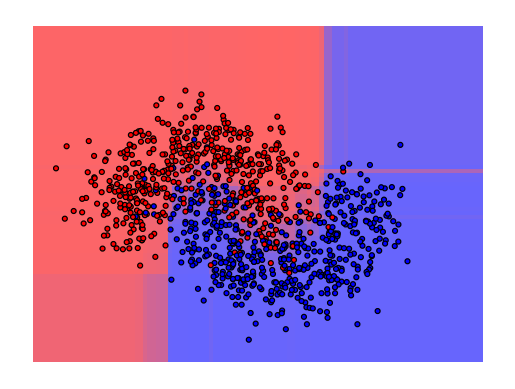

<ggplot: (8741906445698)>

In [19]:
(
    ggplot() + 
    theme_void() + 
    geom_tile(aes(x=dataTest.xx,y=dataTest.yy),alpha=0.6,show_legend=False,fill=dataTest.ClassOutput) +
    geom_point(aes(x=tempData[0][:,0],y=tempData[0][:,1]),show_legend=False,color="black",fill=colorData)
)